# Week 12, Part 2

### Topic
 1. Revisit Hubble with larger dataset


following here: http://adamdempsey90.github.io/python/dark_energy/dark_energy.html

error bars from: http://www.phys.boun.edu.tr/~ozcan/lectures/phys443autumn13/classwork/fitting/fittingData_part2.html




In [1]:
# resize
require(repr)
options(repr.plot.width=8, repr.plot.height=5)

Loading required package: repr


## 1. Revisit Hubble with larger dataset


In [2]:
hubble = read.csv('sn_data_out_lg.csv',stringsAsFactors=TRUE)

In [3]:
head(hubble)

velkms,dMpc,derrMpc
2997.920,51.5229,8.77905
2997.920,43.6516,7.63887
2997.920,55.4626,9.96117
3897.296,63.6796,9.09091
3897.296,55.7186,7.69781
4197.088,66.9885,8.94630


We now have an extra error term to the distance.  Grabbing each as a vector:

In [5]:
distance = hubble[,2] # Mpc
vel = hubble[,1] # km/s
# errors in distance
distErr = hubble[,3] # Mpc

First things first, let's plot!

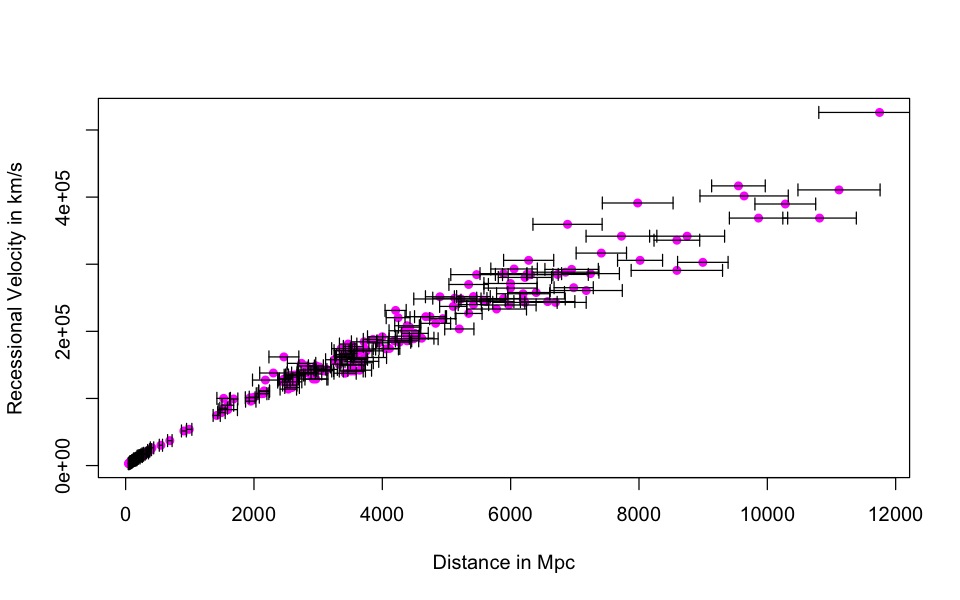

In [6]:
plot(distance, vel, pch=16, 
     col=30, xlab='Distance in Mpc', 
     ylab = 'Recessional Velocity in km/s')
# plot errors, for fun
arrows(distance-distErr*0.5,vel, 
       distance+distErr*0.5,vel, length=0.05, angle=90, code=3)

**Q1:** If we assume we are fitting ressessional velocity as a function of distance, what is b1 (Hubble's constant)?  What about if we add another function of distance (some extra power of distance...)

**Bonus:** What about if we instead fit distance as a function of velocity?
  * Aside: now formula for hubble's is distance = velocity/Hubble's constant (so Hubble's constant = 1/b1)
What new power of *velocity* should we look at?

**Bonus bonus:** assuming you're working with the data in the "Bonus", if you bin in velocity space, what is the $\chi^2$ of your fit?

**A1:**

How linear is this thing?

In [7]:
cor(distance,vel)

[1] 0.9837708

So, pretty linear, but let's still see if we can do better as by eye it looks a bit less than linear at larger distances.  Let's see if we can get a better overall fit using the square of the distance as a "2nd" explanatory variable:

In [14]:
d2 = distance^2 # for lg, 2nd order!
myLine = lm(formula = vel ~ distance+d2, 
            data = data.frame(d2,distance,vel),weights=1./distErr^2) #lg

In [15]:
summary(myLine)


Call:
lm(formula = vel ~ distance + d2, data = data.frame(d2, distance, 
    vel), weights = 1/distErr^2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-92.012 -28.605  -3.992  25.340 165.438 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.792e+02  1.046e+02   7.451 2.62e-12 ***
distance     5.567e+01  7.199e-01  77.332  < 2e-16 ***
d2          -2.093e-03  1.577e-04 -13.272  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.38 on 203 degrees of freedom
Multiple R-squared:  0.9881,	Adjusted R-squared:  0.988 
F-statistic:  8425 on 2 and 203 DF,  p-value: < 2.2e-16


We can see that we have a very small p-value for our slope - so probably a line is a good fit!

Let's analyze our residuals:

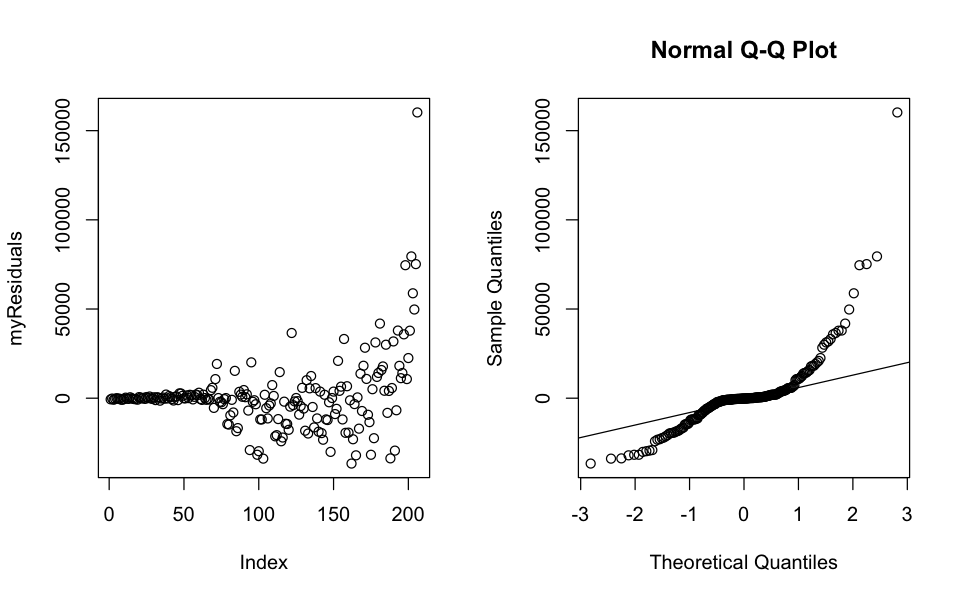

In [16]:
par(mfrow=c(1,2))
myResiduals = resid(myLine)
plot(myResiduals)

# we can also check if our residuals are normal (one of our fit conditions)
qqnorm(myResiduals)
qqline(myResiduals)

There is definitely some non-normal stuff going on there!

Let's plot our data & fit, first grabbing coefficients:

In [17]:
b0 = myLine$coefficients[1] # intercept
b1 = myLine$coefficients[2] # slope
b2 = myLine$coefficients[3] # slope for x2, lg

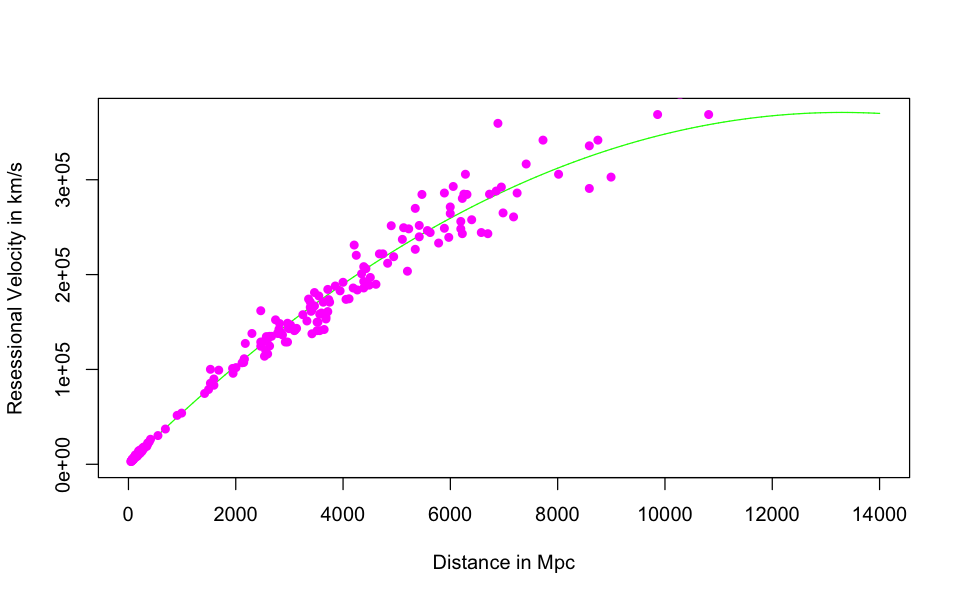

In [18]:
x = seq(-0.25, 14000) # little negative just so we can see the points
myNewLine = b0 + b1*x + b2*x**2 # lg
plot(x, myNewLine, type='l', col="green", xlab="Distance in Mpc", ylab="Resessional Velocity in km/s")
points(distance, vel, pch=16, col=30) # over plot observation points

That looks pretty good!  Let's also plot the errors again:

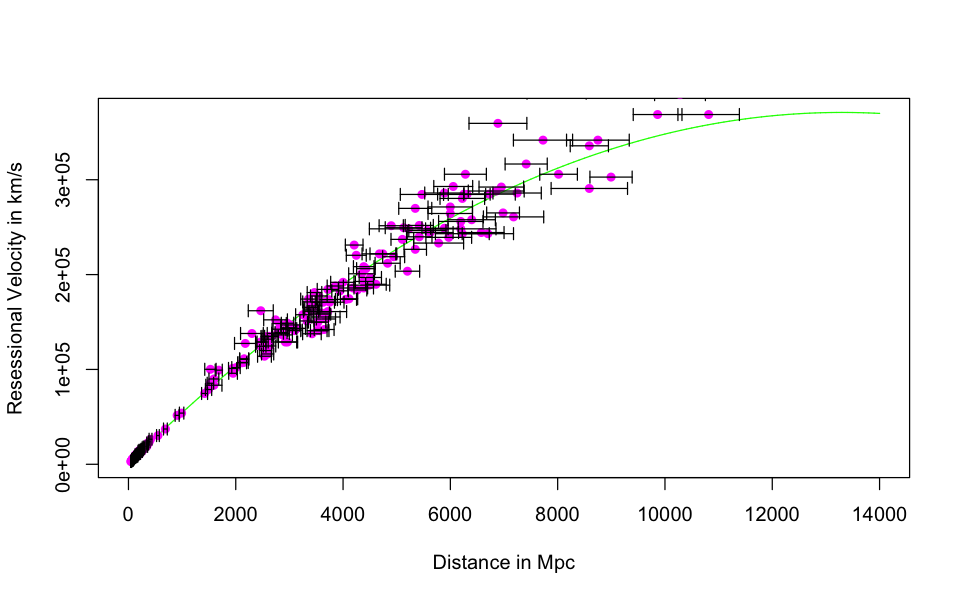

In [19]:
x = seq(-0.25, 14000) # little negative just so we can see the points
myNewLine = b0 + b1*x + b2*x**2 # lg
plot(x, myNewLine, type='l', col="green", xlab="Distance in Mpc", ylab="Resessional Velocity in km/s")
points(distance, vel, pch=16, col=30) # over plot observation points

# plot errors
arrows(distance-distErr*0.5, vel,
       distance+distErr*0.5,vel,length=0.05, angle=90, code=3)

Finally, let's add in our diagnostic plots:

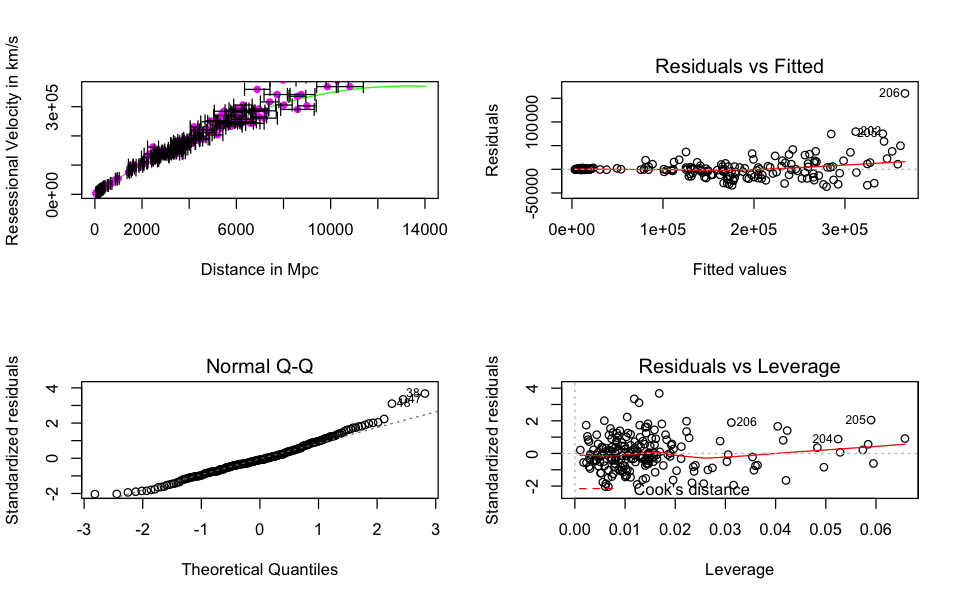

In [20]:
par(mfrow=c(2,2))

plot(x, myNewLine, type='l', col="green", xlab="Distance in Mpc", ylab="Resessional Velocity in km/s")
points(distance, vel, pch=16, col=30) # over plot observation points
# plot errors
arrows(distance-distErr*0.5, vel,
       distance+distErr*0.5,vel,length=0.05, angle=90, code=3)
plot(myLine, which=1) # Residuals plot
plot(myLine, which=2) # qq-norm plot

# now, lets add another plot to our meagurie
plot(myLine, which=5) # residuals vs. leverage

Hey, that looks pretty good!

**Bonus A:**

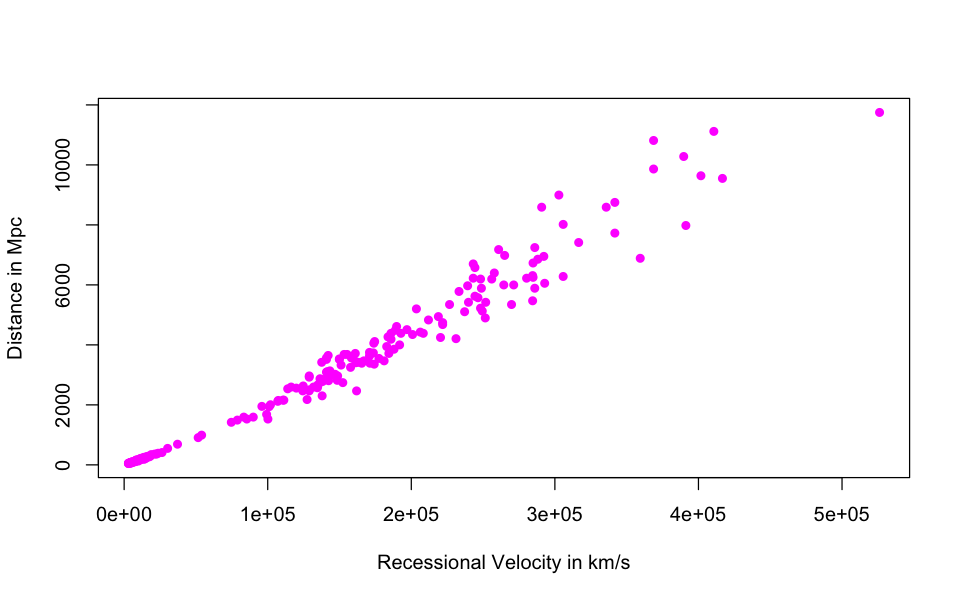

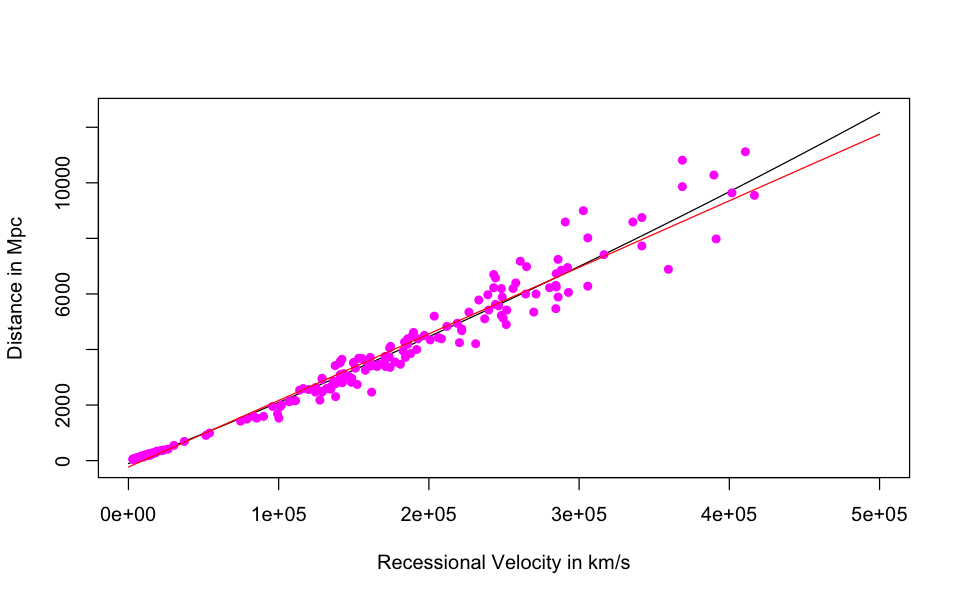

In [21]:
distance = hubble[,2] # Mpc
vel = hubble[,1] # km/s

# first things first, lets plot!
par(mfrow=c(1,1))
plot(vel, distance, pch=16, 
     col=30, ylab='Distance in Mpc', 
     xlab = 'Recessional Velocity in km/s')

myLineFit = lm(formula=distance~vel, data=data.frame(vel,distance))

v2 = vel*vel
myFit = lm(formula = distance ~ vel+v2, 
            data = data.frame(vel, v2,distance))

x = seq(0,5e5, length=200)
newLine = myFit$coefficients[1] + myFit$coefficients[2]*x +myFit$coefficients[3]*x*x
plot(x, newLine, type='l',ylab='Distance in Mpc', 
     xlab = 'Recessional Velocity in km/s')
points(vel, distance, pch=16, col=30) # over plot observation points

lines(x, myLineFit$coefficients[1]+myLineFit$coefficients[2]*x, col='red')